In [4]:
% run tsne.py

X = Math.loadtxt("../../data/burn_originals.txt");
Y = tsne(X, 2, 50, 20.0);

Preprocessing the data using PCA...
Computing pairwise distances...

<string>:80: ComplexWarning: Casting complex values to real discards the imaginary part
<string>:25: RuntimeWarning: overflow encountered in divide



Computing P-values for point  0  of  338 ...
Computing P-values for point  100  of  338 ...
Computing P-values for point  200  of  338 ...
Computing P-values for point  300  of  338 ...
Mean value of sigma:  6.74231601322


<string>:25: RuntimeWarning: invalid value encountered in divide
<string>:26: RuntimeWarning: overflow encountered in divide
<string>:26: RuntimeWarning: invalid value encountered in divide


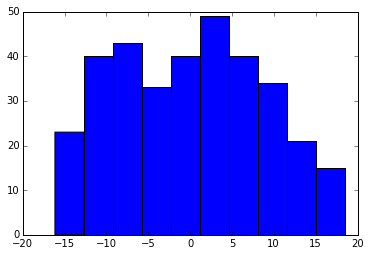

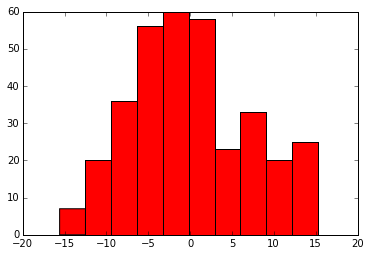

In [11]:
%matplotlib inline
import matplotlib.pylab as plt

# first reduced dimension
plt.hist(Y[:,0])
plt.show()

# second reduced dimension
plt.hist(Y[:,1], color = 'red')
plt.show()

In [6]:
import sklearn.cluster as sk

kmeans = sk.KMeans(n_clusters = 6)
kmeans.fit(Y)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
import pandas as pd
df = pd.DataFrame(index = range(1,339))
centers = map(float, kmeans.labels_)
df['cluster'] = kmeans.labels_

plt.hist(df.cluster.values, bins = 6, range = (0,6))

(array([ 53.,  56.,  50.,  68.,  76.,  35.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

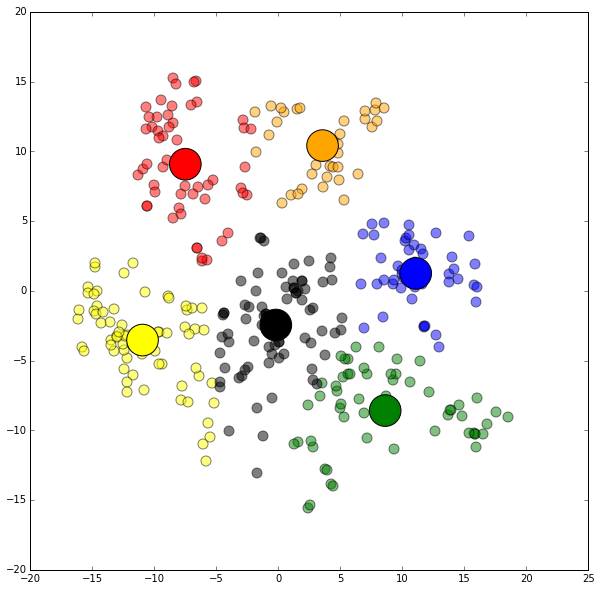

In [12]:
kc = kmeans.cluster_centers_

memb = Math.array(kmeans.labels_)

colors = ['red','green','blue','yellow','black','orange']
plt.figure(figsize=(10,10))
for i in range(6):
    ind = Math.where(memb==i)
    Plot.scatter(Y[ind,0], Y[ind,1], 100, colors[i], alpha = 0.5)
Plot.scatter(kc[:,0], kc[:,1], 1000, colors)

# Y2 = tsne(X, 2, 50, 15.0);
# Plot.scatter(Y2[:,0], Y2[:,1], 100, [[0.75, 0.82, 0.35, 0.42]])

In [6]:
import sklearn.cluster as sk

sc = sk.SpectralClustering(n_clusters = 6)
sc.fit(Y)

sc_centers = sc.affinity_matrix_

print(sc_centers)

memb = Math.array(sc.labels_)

# colors = ['red','green','blue','yellow','black','orange']
# plt.figure(figsize=(10,10))
# for i in range(6):
#     ind = Math.where(memb==i)
#     Plot.scatter(Y[ind,0], Y[ind,1], 100, colors[i], alpha = 0.6)
# # Plot.scatter(Y[:,0], Y[:,1], 100, [[0.65, 0.32, 0.5, 0.2]])
# Plot.scatter(sc[:,0], sc[:,1], 1000, [[0.15, 0.62, 0.25, 0.12], [0.75, 0.82, 0.35, 0.42]])

[[  1.00000000e+000   1.45495315e-055   1.45263337e-148 ...,
    3.32705580e-223   1.16638718e-110   2.09935429e-239]
 [  1.45495315e-055   1.00000000e+000   6.73473895e-028 ...,
    3.80698486e-137   1.59615592e-034   1.49571871e-283]
 [  1.45263337e-148   6.73473895e-028   1.00000000e+000 ...,
    3.80945300e-208   1.37188786e-079   0.00000000e+000]
 ..., 
 [  3.32705580e-223   3.80698486e-137   3.80945300e-208 ...,
    1.00000000e+000   1.85117775e-035   1.42001207e-093]
 [  1.16638718e-110   1.59615592e-034   1.37188786e-079 ...,
    1.85117775e-035   1.00000000e+000   1.02383132e-162]
 [  2.09935429e-239   1.49571871e-283   0.00000000e+000 ...,
    1.42001207e-093   1.02383132e-162   1.00000000e+000]]


In [ ]:
import sklearn.cluster as sk

ac = sk.AgglomerativeClustering(n_clusters = 6)
ac.fit(Y)

ac_centers = ac.affinity_matrix_

print(ac_centers)

# colors = ['red','green','blue','yellow','black','orange']
# plt.figure(figsize=(10,10))
# for i in range(6):
#     ind = Math.where(memb==i)
#     Plot.scatter(Y[ind,0], Y[ind,1], 100, colors[i], alpha = 0.6)
# # Plot.scatter(Y[:,0], Y[:,1], 100, [[0.65, 0.32, 0.5, 0.2]])
# Plot.scatter(sc[:,0], sc[:,1], 1000, [[0.15, 0.62, 0.25, 0.12], [0.75, 0.82, 0.35, 0.42]])